In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.metrics import fbeta_score , accuracy_score , recall_score , precision_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
%matplotlib inline 

from time import time
from sklearn import svm
from sklearn.ensemble import   AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.utils import shuffle


from sklearn import datasets, linear_model
np.random.seed(42)

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Load the diabetes dataset
# diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# # Use only one feature
# diabetes_X = diabetes_X[:, np.newaxis, 2]

# # Split the data into training/testing sets
# diabetes_X_train = diabetes_X[:-20]
# diabetes_X_test = diabetes_X[-20:]

# # Split the targets into training/testing sets
# diabetes_y_train = diabetes_y[:-20]
# diabetes_y_test = diabetes_y[-20:]


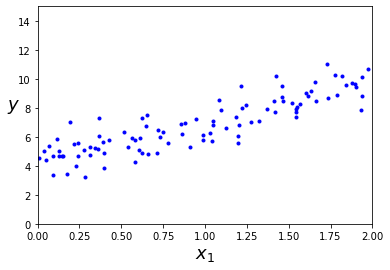

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

There is a lot of math behind linear regression , but it is quite easy to undrestand. 

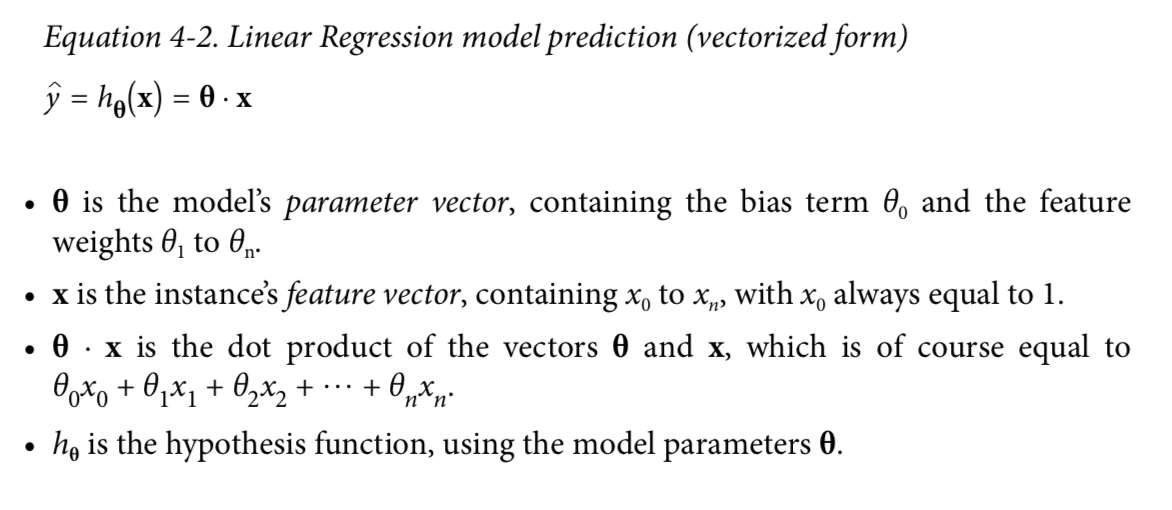

In [4]:
from IPython.display import Image
Image(filename='images/Screenshot 2021-01-24 at 17.53.44.png') 

The regression works by minimizing the cost function :
    
    

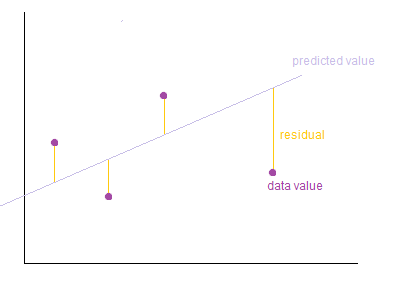

In [5]:
Image(filename='images/residuals.png' , width = 600, height = 300) 

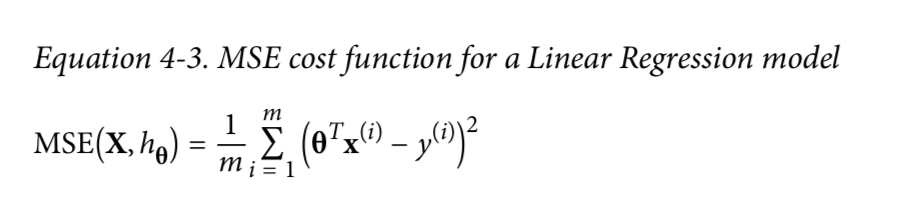

In [6]:
Image(filename='images/Screenshot 2021-01-24 at 17.56.21.png') 

In [7]:
# creating new values 

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.intercept_

array([4.21509616])

In [10]:
lin_reg.coef_

array([[2.77011339]])

In [11]:
X_new = np.array([[0], [2]])
y_test= 4 + 3 * X_new + np.random.randn(2, 1)

In [12]:
y_predict = lin_reg.predict(X_new)

In [13]:
X_new
y_predict

array([[4.21509616],
       [9.75532293]])

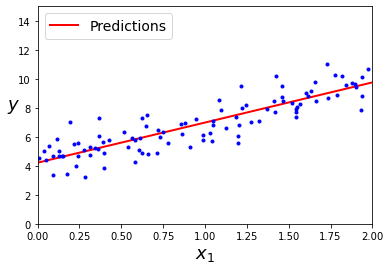

In [14]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()



# Linear regression Metrics 
Mean absoloute Error, 

$ MAE = (\frac{1}{m})\sum_{i=1}^{m}\left |\hat y_{i} - y_{i} \right |$

Root mean Square erro 

$ RMSE = \sqrt{(\frac{1}{m})\sum_{i=1}^{m}(\hat y_{i} - y_{i})^{2}}$


Mean Square Error

$ MSE = {(\frac{1}{m})\sum_{i=1}^{m}(\hat y_{i} - y_{i})^{2}}$


R2 Score 
if 

$\bar{y} = \frac {1}{m}\sum y_i $

\begin{align} R^2&=1-\frac{\text{sum squared regression (SSR)} }{\text{total sum of squares (SST)} }\\ &=1-\frac{\sum({y_i}-\hat{y_i})^2}{\sum(y_i-\bar{y})^2}\\  \end{align}

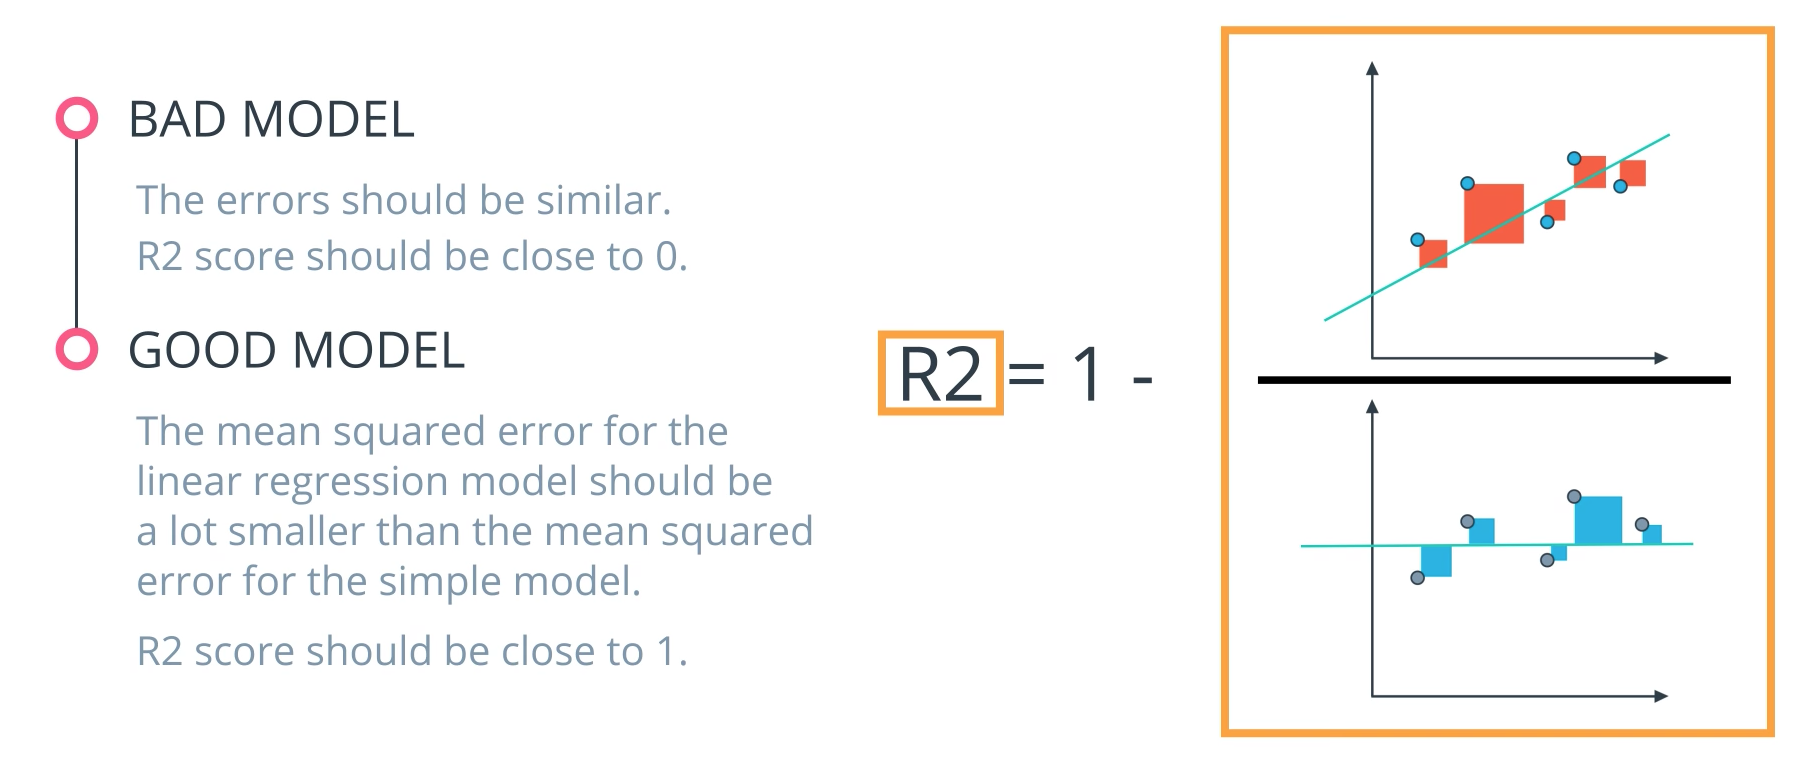

In [15]:
Image(filename='images/screen-shot-2018-05-26-at-7.55.22-pm.png') 

In [16]:
print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predict))


Coefficients: 
 [[2.77011339]]
Mean squared error: 1.46
Coefficient of determination: 0.89


your turn . 



In [17]:
# If you have such a data : 
    
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [18]:
#what would be the value y of : 

X_new=np.linspace(-3, 3, 100).reshape(100, 1)


please plot the values in a scatter plot as above : 

Did you have a good fit ? why ?

# polynomial regression

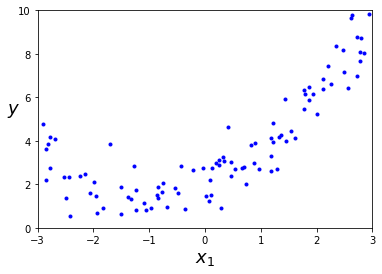

In [19]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.46142331])

In [21]:
X_poly[0]

array([0.46142331, 0.21291147])

In [22]:
1.76886782 * 1.76886782

3.1288933646315527

Now use X_poly for your code ! did the fit improve ? what about the metrics ?

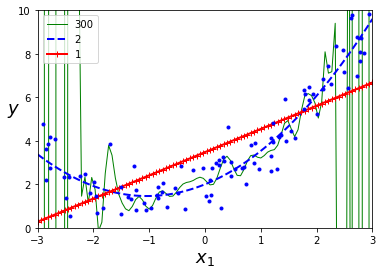

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


# Regularization 
a good way to reduce overfitting is to regularize the model (i.e., to constrain it).


Which model is working better ? Free discussion !


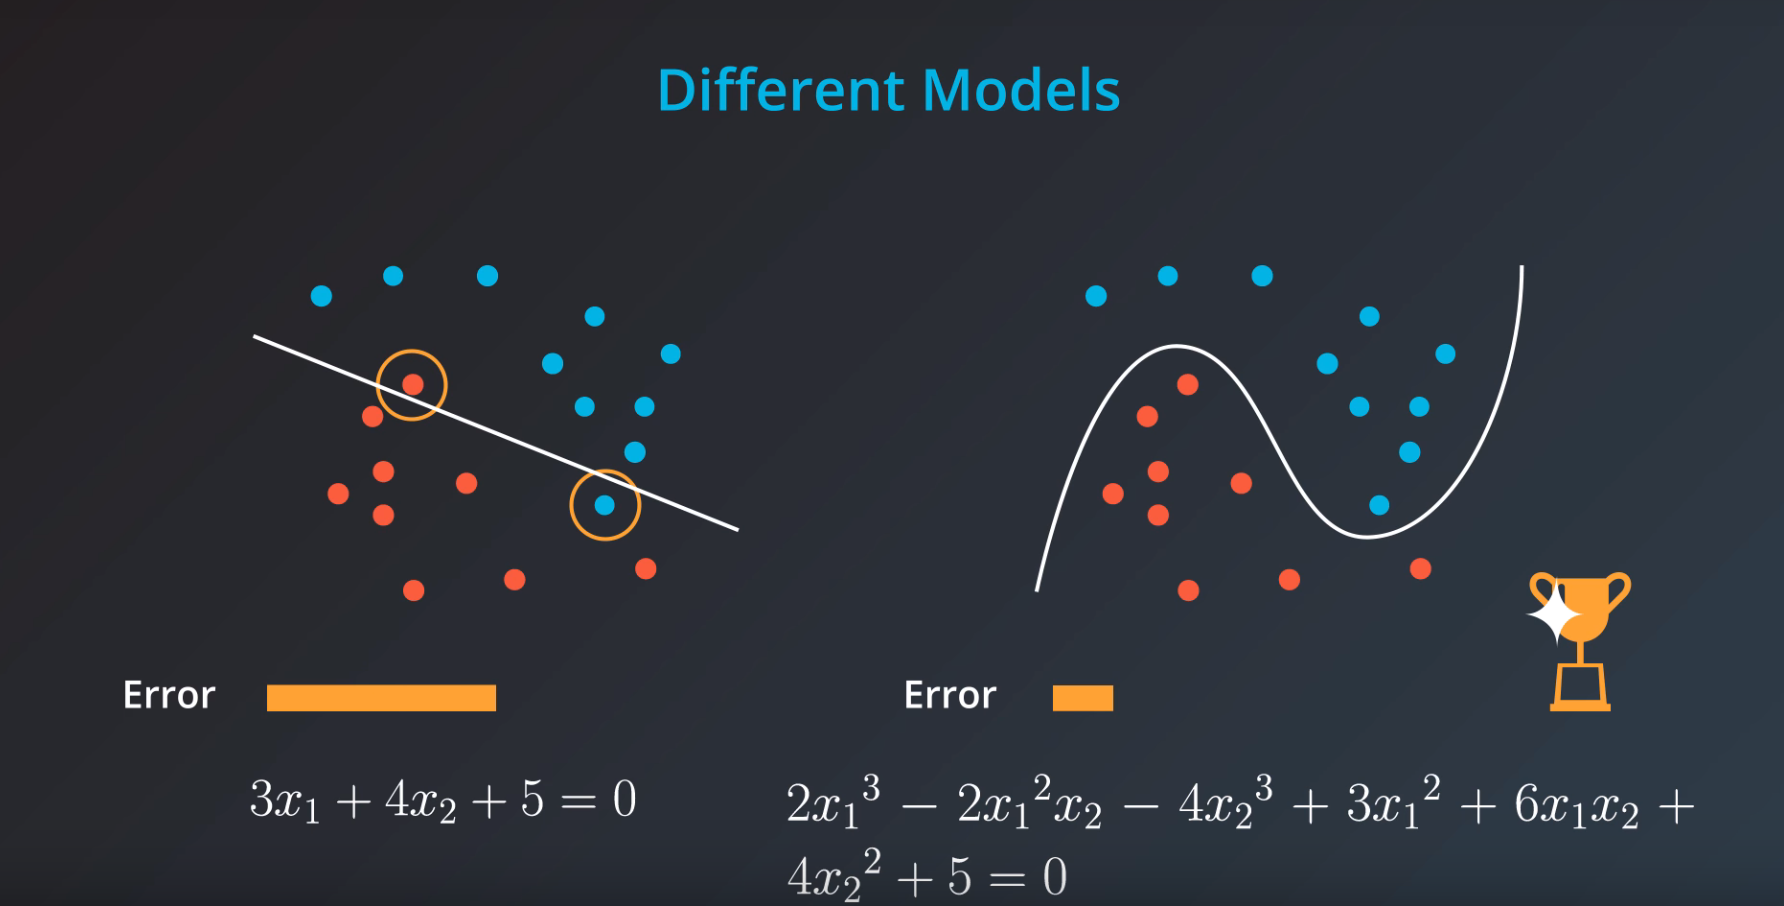

In [24]:
Image(filename='images/Screenshot 2021-01-24 at 19.16.23.png' ) 

L1 norm : ? Manhattan distance
    
L2 norm : ? Euclidean distance 

What we do is we add either L1 norm , or l2 norm to the Error which the simpler the model the error is lowest .
Can you calculate what would be the l1 and l2 norm for both of the models above ?

alpha ( in some cases it is also called Lambda ) , depending on how much we want to penalize the complex model we would use an alpha. a small amount of alpha penalizes the 
complex model less.



If your lambda value is too high, your model will be simple, but you run the risk of underfitting your data. Your model won't learn enough about the training data to make useful predictions.

If your lambda value is too low, your model will be more complex, and you run the risk of overfitting your data. Your model will learn too much about the particularities of the training data, and won't be able to generalize to new data.



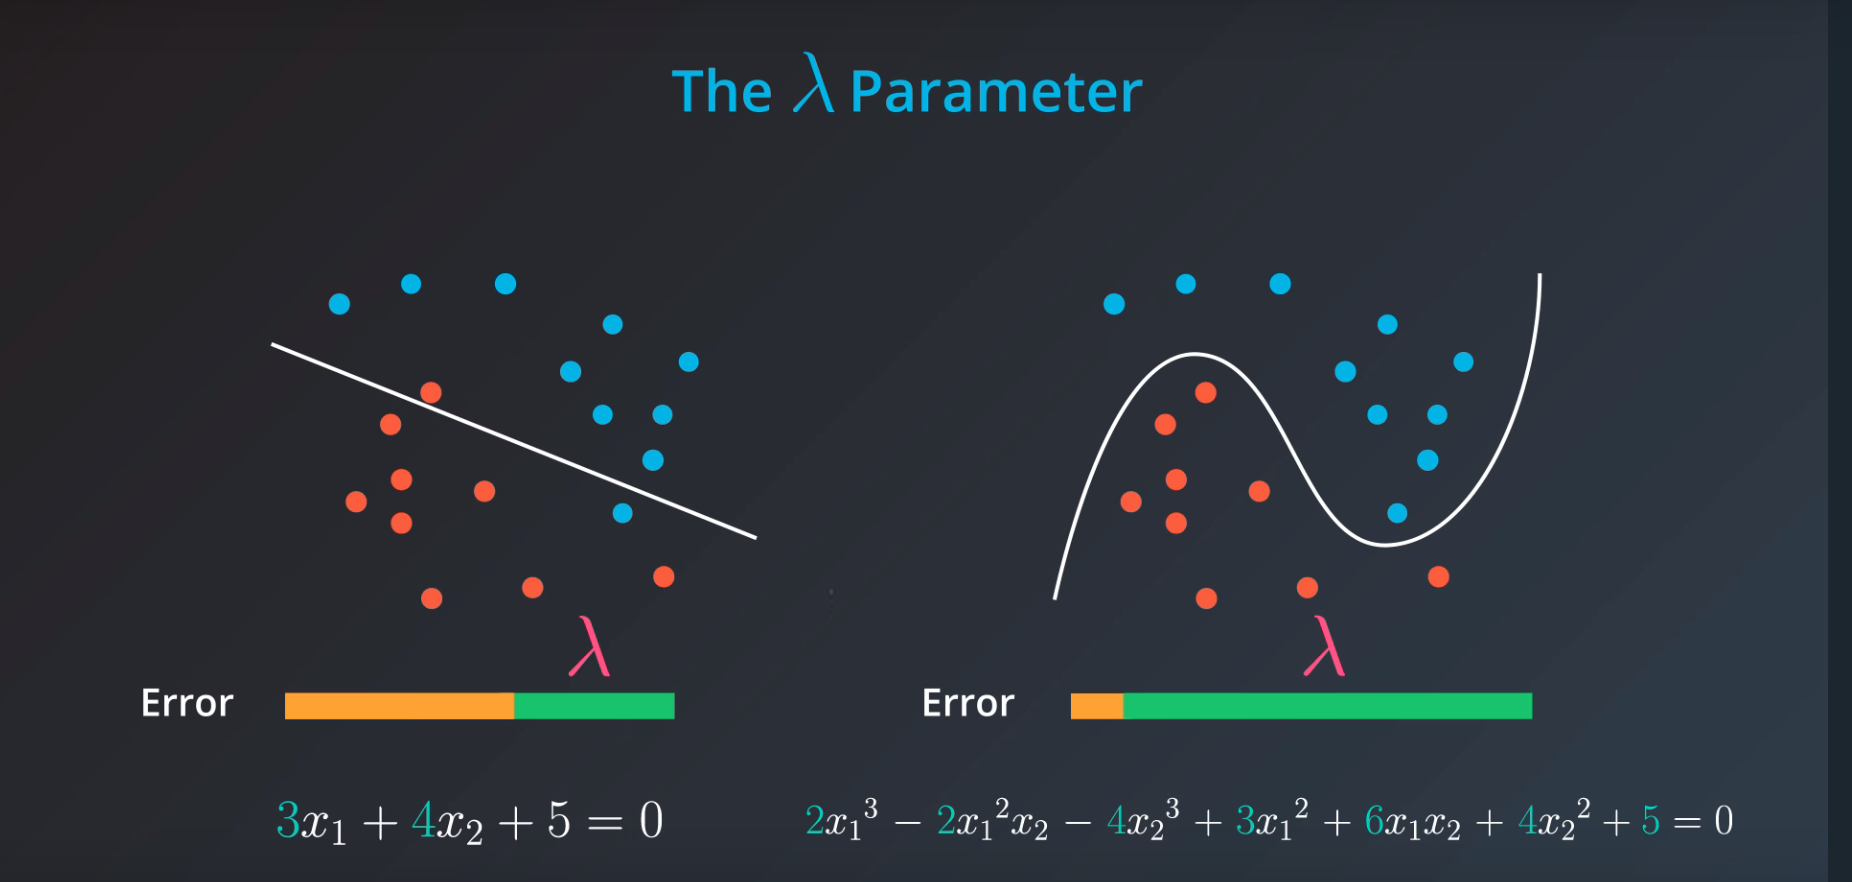

In [25]:
Image(filename='images/Screenshot 2021-01-24 at 19.25.24.png' ) 

Homework ? What is ridge, lasso and elastic net regression ? 
use the data from above to fit the data using each , write a small summary which one worked better ?

- Break 10 minutes 

# logistic regression

Is it a regression ? No , logistic regression is used for classification : it calculates a probability of 
    each data point belonging to a class. 
    
    
    

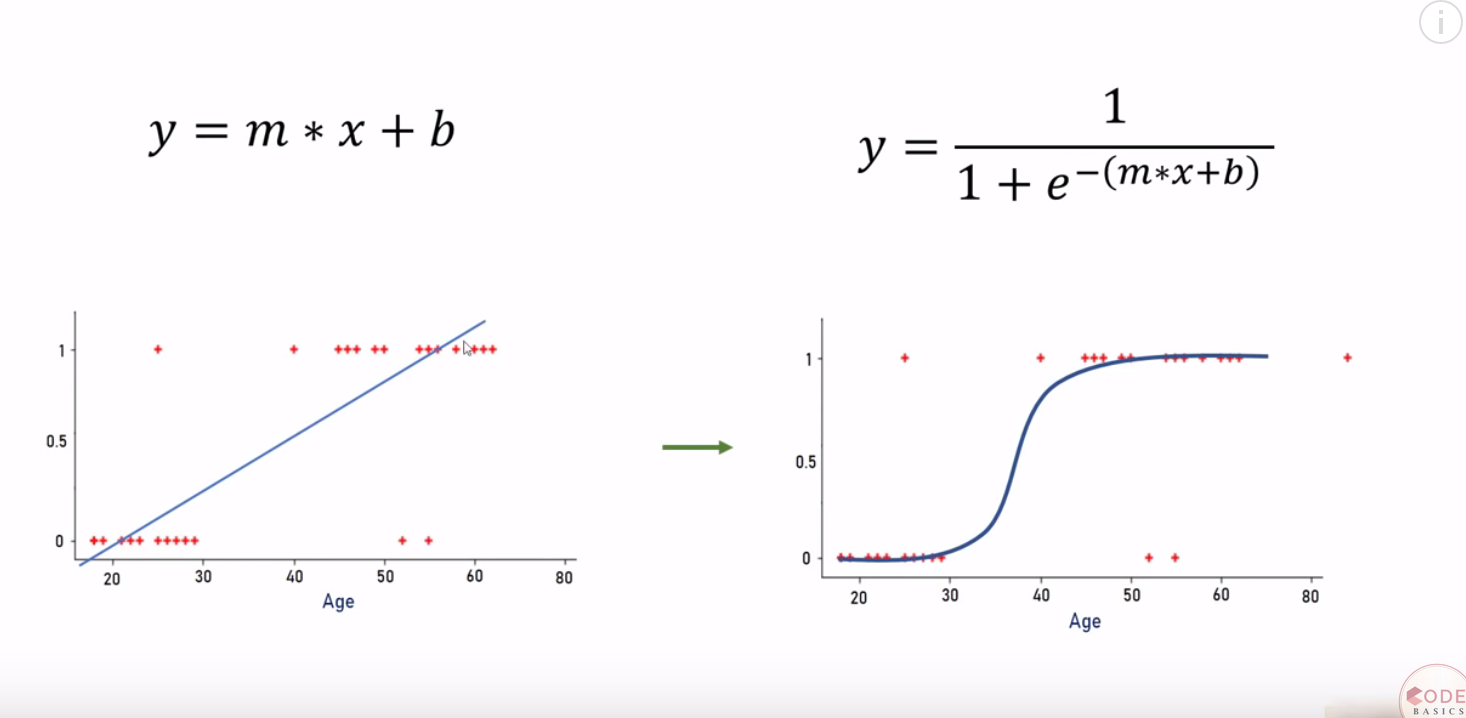

In [26]:
Image(filename='images/Screenshot 2021-01-24 at 19.45.00.png' ) 

how to use it ?


remember Charity data theat we have. Load the clean data and run logistic regression to find the income class. 

In [27]:
df=pd.read_csv('clean_charity_ml.csv' , index_col = 0)

In [28]:
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X = df.iloc[:,:-1]
y = df.loc[:,['income']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =42)

In [30]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_predict= log_reg.predict(X_test)

In [32]:
y_proba = log_reg.predict_proba(X_test)

In [33]:
score=log_reg.score(X_test,y_test) # shows accuracy of model 
score

0.8454394693200663

In [34]:
from sklearn.metrics import fbeta_score , accuracy_score , recall_score , precision_score , confusion_matrix


In [35]:
accuracy_score(y_test, y_predict)

0.8454394693200663

In [36]:
cm = confusion_matrix(y_test, y_predict)


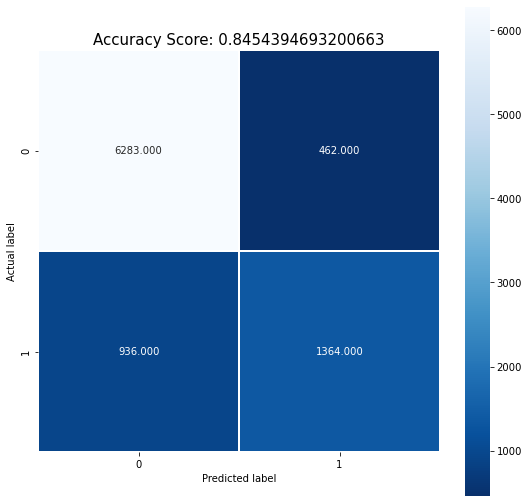

In [37]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

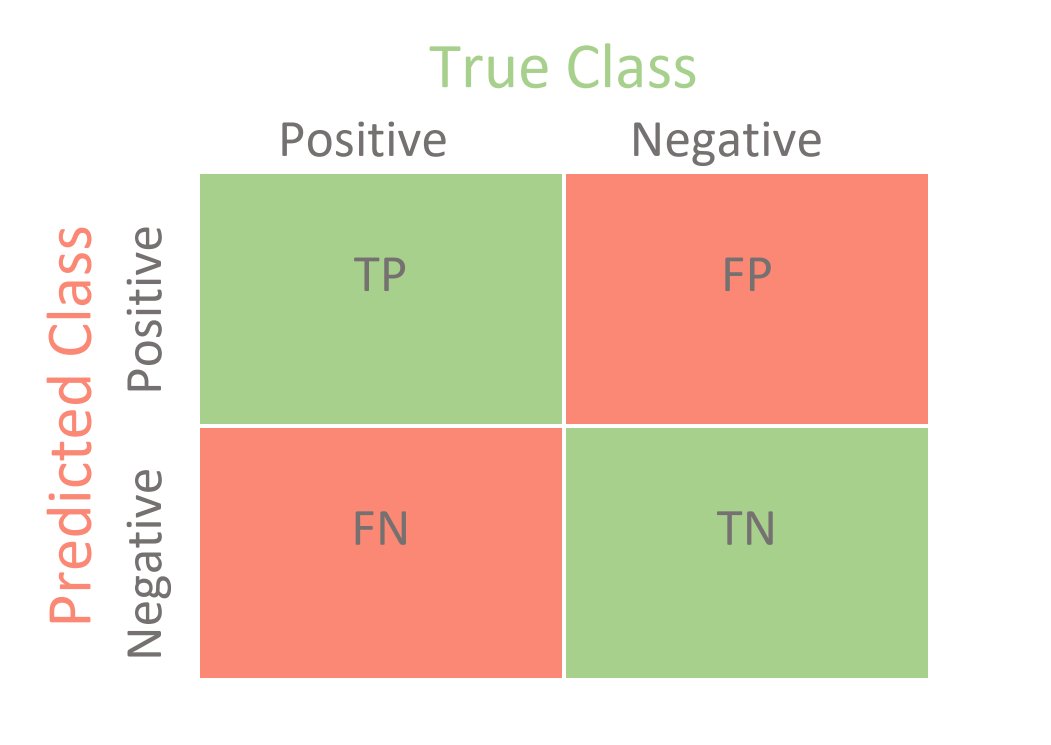

In [38]:
Image(filename='images/cm.png' ) 

resources :
    
https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

https://www.youtube.com/watch?v=zM4VZR0px8E
    
https://joparga3.github.io/standford_logistic_regression/#intuition-behind-logistic-regression
    
https://developers.google.com/machine-learning/crash-course/logistic-regression/video-lecture
    
https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2
    
udacity intro to machine learning with tensorflow. 

https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb
    
Hands on machine learning with tensor flow